# Stock Price Prediction

### Project to predict the prices of Stocks by using various Machine Learning Models and picking best out of them.

### Each data science problem is solved in different stages/steps
### We will also implement same in our project 'Stock Price Prediction'


# Step 1 : Business Understanding or rather Problem Understanding

### In our Project we have to predict the stock prices of Tesla, a car company on a given date.

# Step 2 : Collecting data for training and testing Model

#               Or Data Collection

In [1]:
import pandas as pd
# Pandas library is helpful in dealing with data by using Series and DataFrames.

import numpy as np
# Numpy library is used to work with Arrays efficiently

In [2]:
data=pd.read_csv('Tesla.csv')      # read_csv() function of Pandas is used to read data from .csv file and convert it into
                                   # dataframe object.

data.head()                       # head(n) is used to show first n records. n is 5 by default.

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data.shape                        # shape gives dimensions of the dataframe or Series in form (r,c) 
                                  # where r is rows and c is column

(1692, 7)

In [4]:
data.columns                      # columns lists the name of all columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
data.info()                       # info() gives information about the type of data stored in columns of dataframe / Series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
data.describe()                  # describe() gives the statistical information about each column such as mean, count, etc.

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# Step 2 : Data Preparation

In [7]:
data.isna().values.any()        # isna() gives information about na values, values then list all those rows, and any() at 
                                # last tells whether any such row exists or not

False

In [8]:
from datetime import datetime as dt

def toOrdinal(x):
    return dt.strptime(x, "%m/%d/%Y").date().toordinal()

data['ordinal'] = data.Date.apply(lambda x : toOrdinal(x))
data.set_index('ordinal',inplace=True)
data

,Date,Open,High,Low,Close,Volume,Adj Close
ordinal,,,,,,,
733952,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
733953,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
733954,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
733955,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
733959,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
736401,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
736402,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
736403,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


# Step 3 : Exploratory Data Analysis

In [9]:
# Importing Modules used for visualizing data

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Open Price', ylabel='Volume in 1e7'>

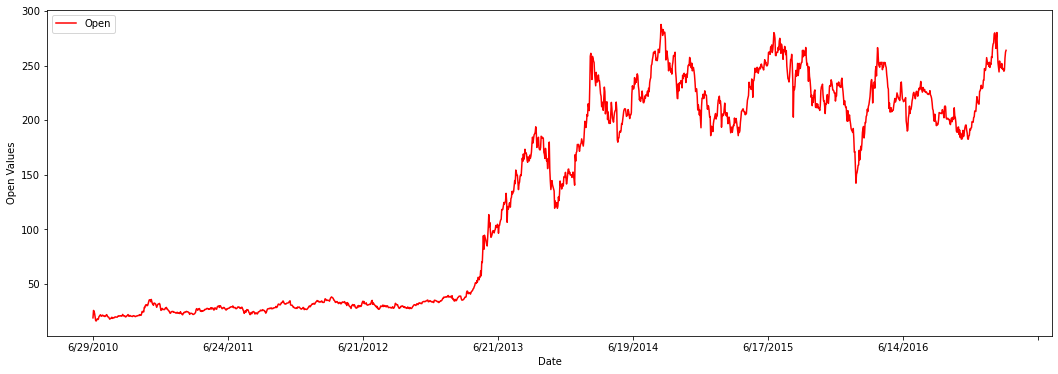

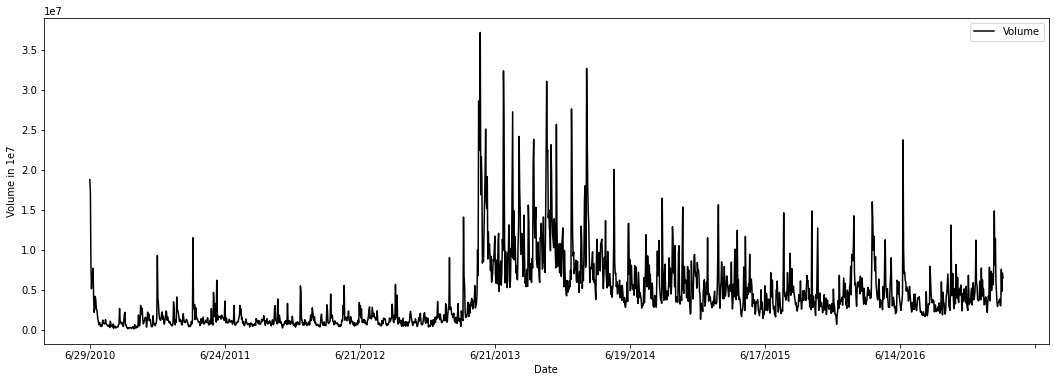

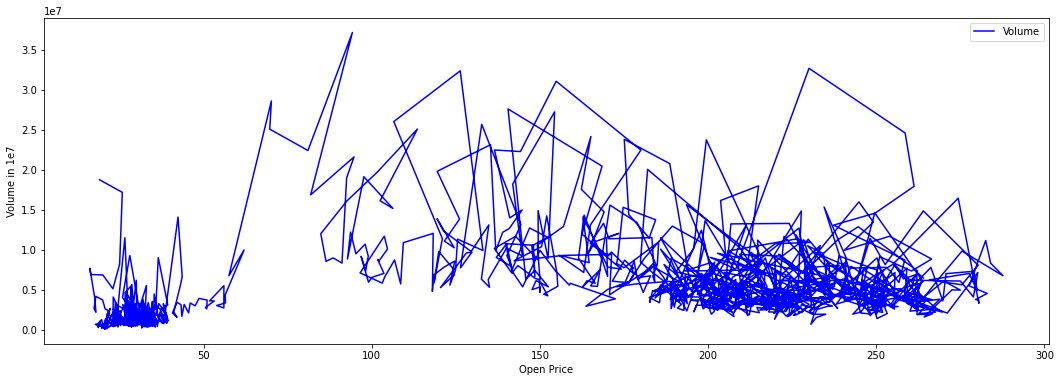

In [10]:
plt.rcParams['figure.figsize']=(18,6)    # It sets the various parameters for plots in this case it is setting Figure Size

data.plot('Date','Open', ylabel='Open Values',color='red')      # Plotting Opening Price of Stocks with dates

data.plot('Date','Volume',ylabel='Volume in 1e7',color='black') # Plotting Volume of trade occured with dates 

data.plot('Open','Volume',ylabel='Volume in 1e7',xlabel='Open Price',color='blue') 
                                                                # Plotting Volume of trade occured with Opening Price

In [11]:
data[data['Close']!=data['Adj Close']]    # Checking whether Close column and Adj Close column contain same data or not

,Date,Open,High,Low,Close,Volume,Adj Close
ordinal,,,,,,,


In [12]:
data.drop('Adj Close',axis=1,inplace=True) # Since Close column and Adj Close contain same data. Hence, we are dropping
data                                       #latter one

,Date,Open,High,Low,Close,Volume
ordinal,,,,,,
733952,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
733953,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
733954,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
733955,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
733959,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
736401,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
736402,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
736403,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600


In [13]:
data.cov()                       # cov() tells the covariance of different columns with respect to each other

,Open,High,Low,Close,Volume
Open,8.894362e+03,9.021580e+03,8.753711e+03,8.887850e+03,1.651060e+08
High,9.021580e+03,9.157517e+03,8.881521e+03,9.022503e+03,1.712103e+08
Low,8.753711e+03,8.881521e+03,8.622093e+03,8.754461e+03,1.586102e+08
Close,8.887850e+03,9.022503e+03,8.754461e+03,8.894977e+03,1.648653e+08
Volume,1.651060e+08,1.712103e+08,1.586102e+08,1.648653e+08,1.845537e+13


<AxesSubplot:>

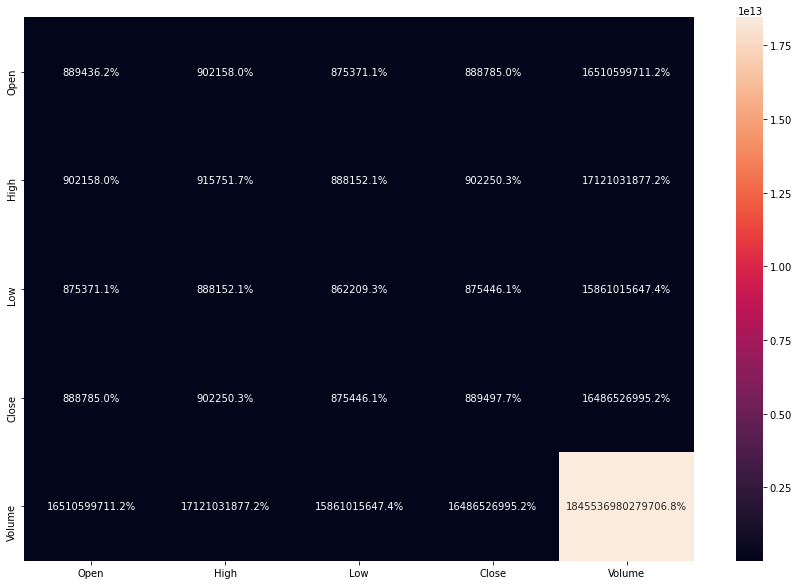

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.cov(),annot=True, fmt=".1%")  # Representation of cov() information in form of heatmap

In [15]:
data.corr()                   # corr() function gives correlation between various columns or data fields

,Open,High,Low,Close,Volume
Open,1.000000,0.999623,0.999605,0.999233,0.407515
High,0.999623,1.000000,0.999521,0.999691,0.416466
Low,0.999605,0.999521,1.000000,0.999656,0.397615
Close,0.999233,0.999691,0.999656,1.000000,0.406907
Volume,0.407515,0.416466,0.397615,0.406907,1.000000


<AxesSubplot:>

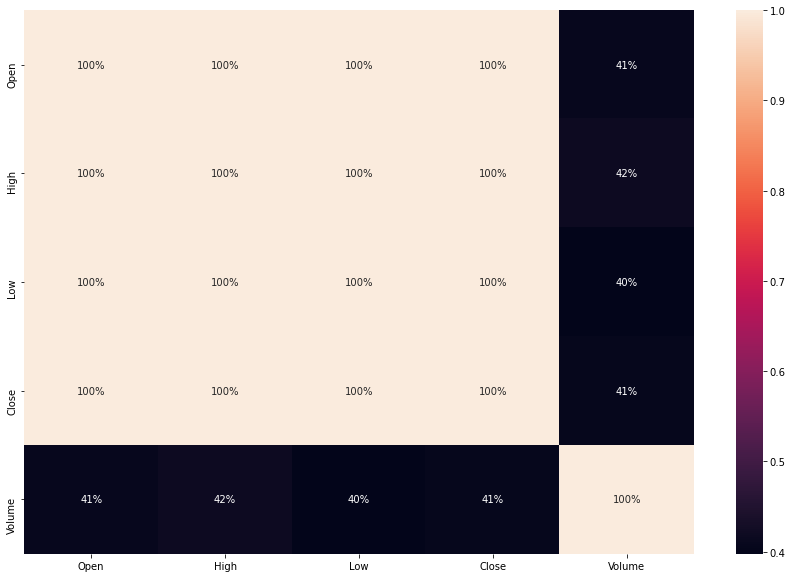

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.0%')       # representation of corr() in form of heatmaps

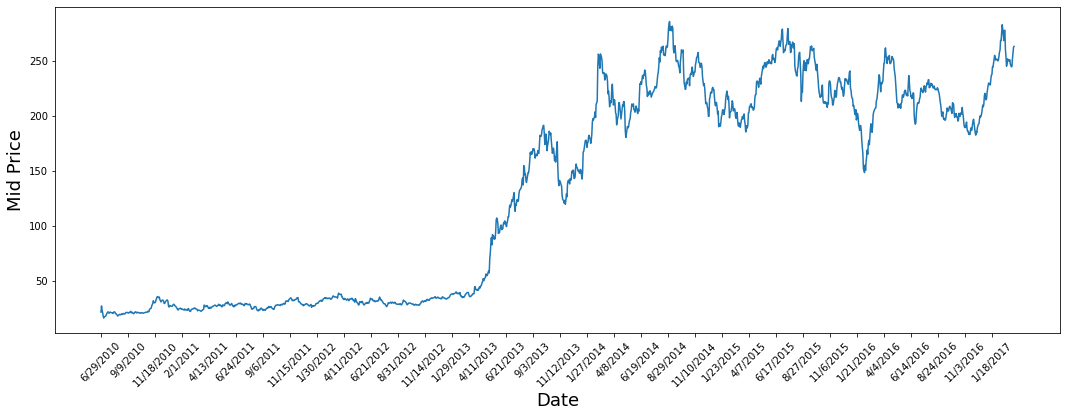

In [17]:
# Plotting Mid Price with dates

plt.rcParams['figure.figsize']=(18,6)
plt.plot(range(data.shape[0]),(data['High']+data['Low'])/2.0)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize=18)
plt.show()

# Step 4 : Modelling the Data

In [18]:
from sklearn.model_selection import train_test_split         # train_test_split() divides data in training data and testing
                                                             # data.This make sure that training/testing data is not biased

train, test = train_test_split(data, test_size=0.20,random_state=0)
train = train.sort_index()

In [19]:
X_train = np.array(train.index).reshape(-1, 1)             # We have selected dates for prediction
y_train = train['Close']

### Linear Regression

In [20]:
# We will first try Linear regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()        # model creation
lin_reg.fit(X_train,y_train)          # training the model
print("Slope", lin_reg.coef_)          # prints slope value
print("Intercept", lin_reg.intercept_) # prints intercept value 

Slope [0.11811097]
Intercept -86700.55149935448


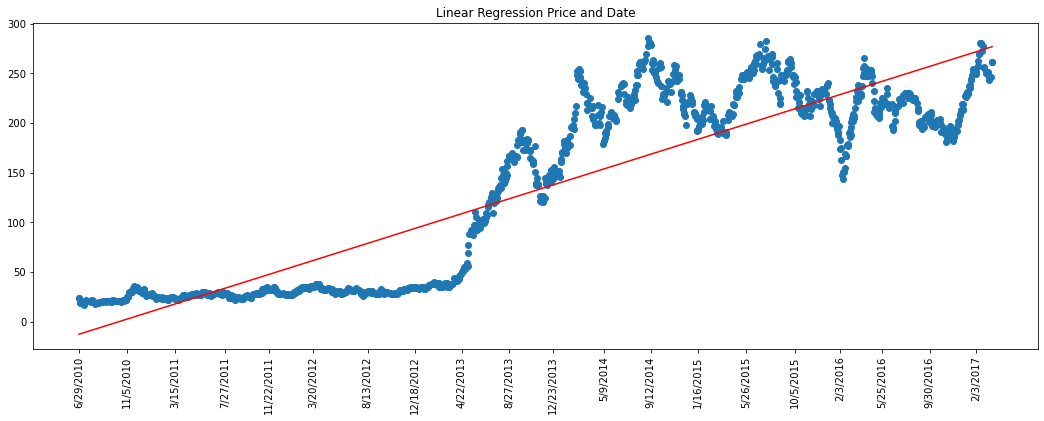

In [21]:
# Visualizing the predictions of Linear Model

pred=lin_reg.predict(X_train)
plt.rcParams['figure.figsize']=(18,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.xticks(train.index[::70],train['Date'].loc[::70],rotation='vertical')
plt.show()

In [22]:
# Preparing Testing Data

test.sort_index()
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close'] # target, actual value 
y_pred = lin_reg.predict(X_test) # predicted value
df_sample=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':y_pred,'Error':(y_test-y_pred)}).tail(10)
df_sample

,Date,Actual,Prediction,Error
ordinal,,,,
735584,12/17/2014,205.820007,179.990434,25.829573
735038,6/19/2013,104.680000,115.501843,-10.821843
734407,9/27/2011,26.190001,40.973819,-14.783818
734781,10/5/2012,28.889999,85.147323,-56.257324
734198,3/2/2011,24.020000,16.288626,7.731374
735157,10/16/2013,183.559998,129.557049,54.002949
736086,5/2/2016,241.800003,239.282142,2.517861
735106,8/26/2013,164.220001,123.533389,40.686612
734753,9/7/2012,29.350000,81.840216,-52.490216


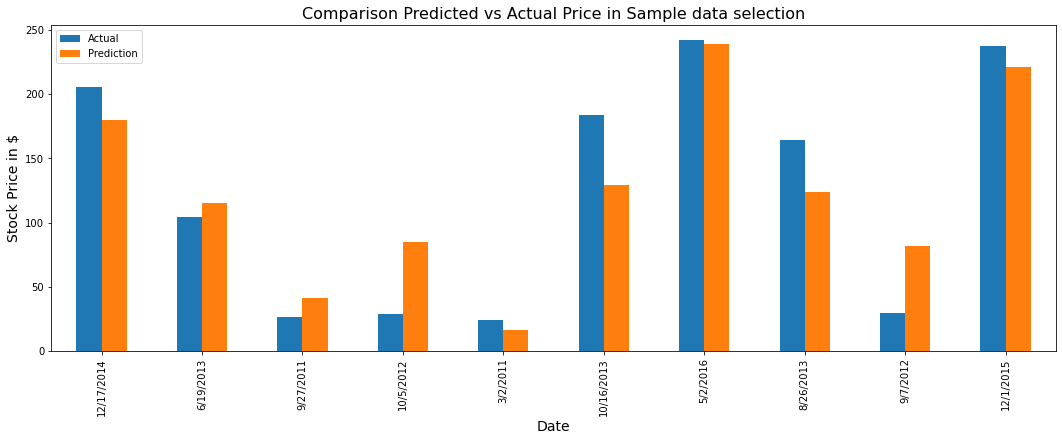

In [23]:
# Comparing Prediction and Actual values of Testing Data of top 10 values

fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Actual', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

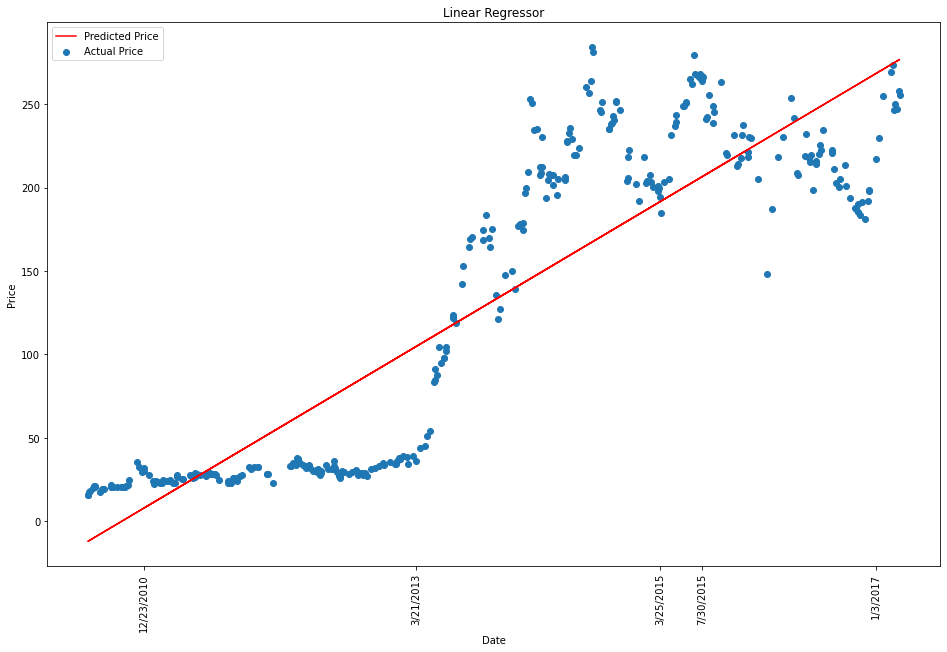

In [24]:
# Plotting Predicted values as a line and Actual values as scattered points of testing data

plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, lin_reg.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::70],test['Date'].loc[::70],rotation='vertical')
plt.title('Linear Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Quadratic Regression

d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1225244.3996623426, tolerance: 1195.9353548428928
  model = cd_fast.enet_coordinate_descent(


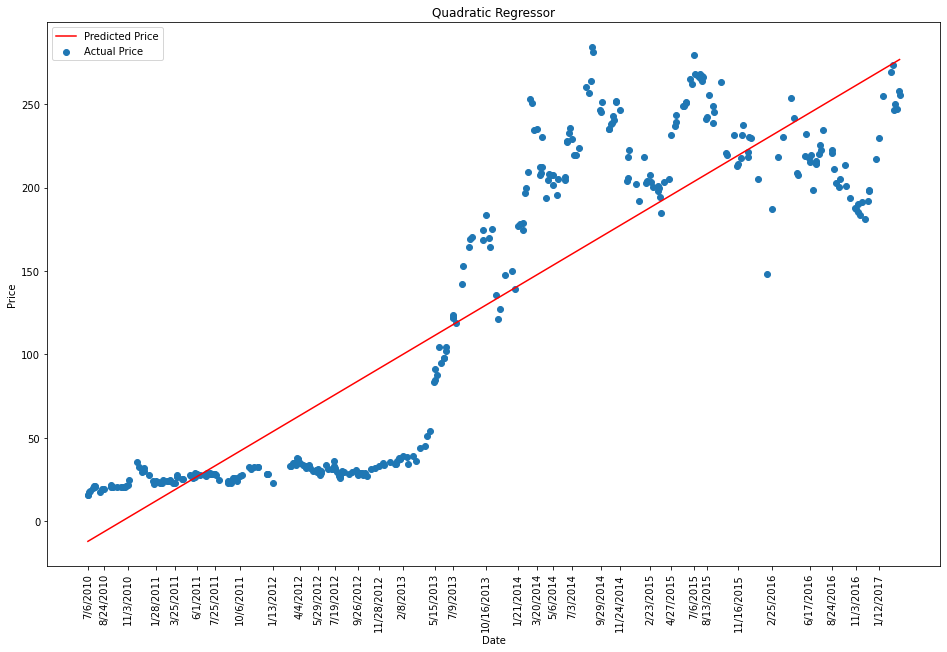

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

test=test.sort_index()
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close'] # target, actual value 

qr = make_pipeline(PolynomialFeatures(3),Lasso())
qr.fit(X_train,y_train)
y_pred = qr.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, qr.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Quadratic Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### K Neighbors Regressor

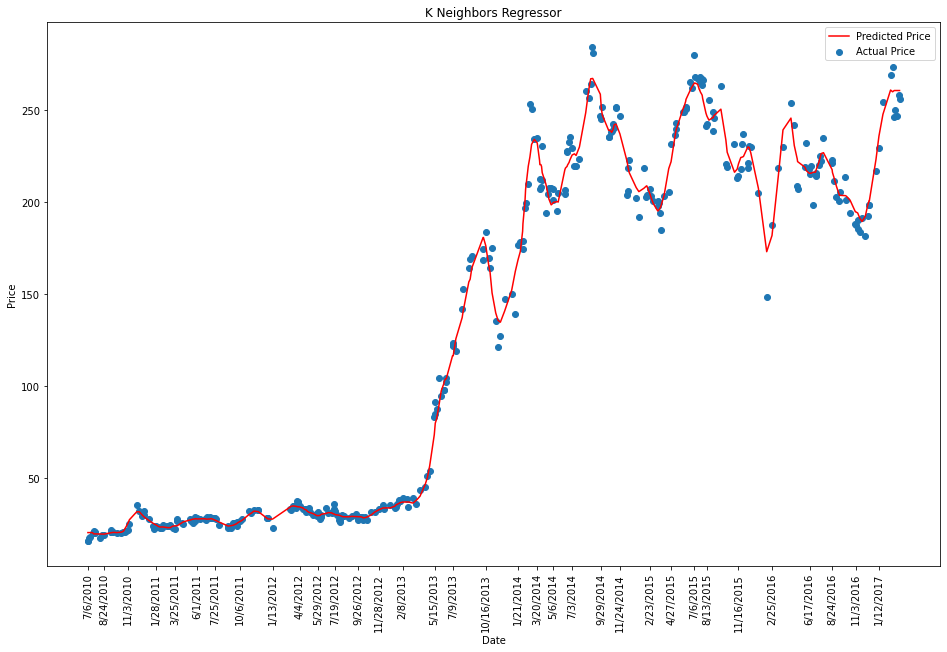

In [26]:
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor(n_neighbors=21).fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, KNN_model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('K Neighbors Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Decision Tree Regressor

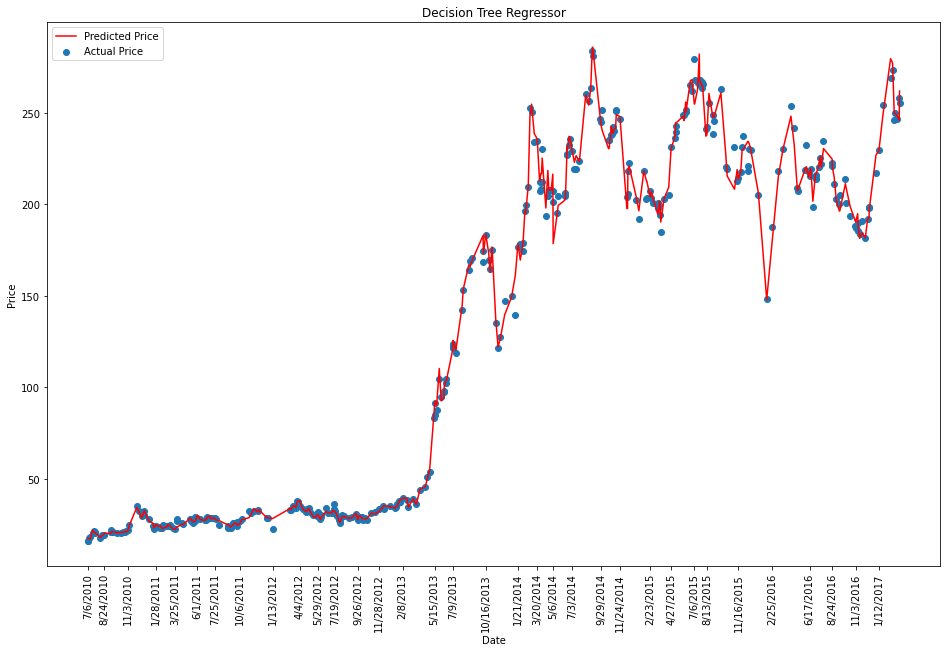

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, tree.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Decision Tree Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Random Forest Regressor

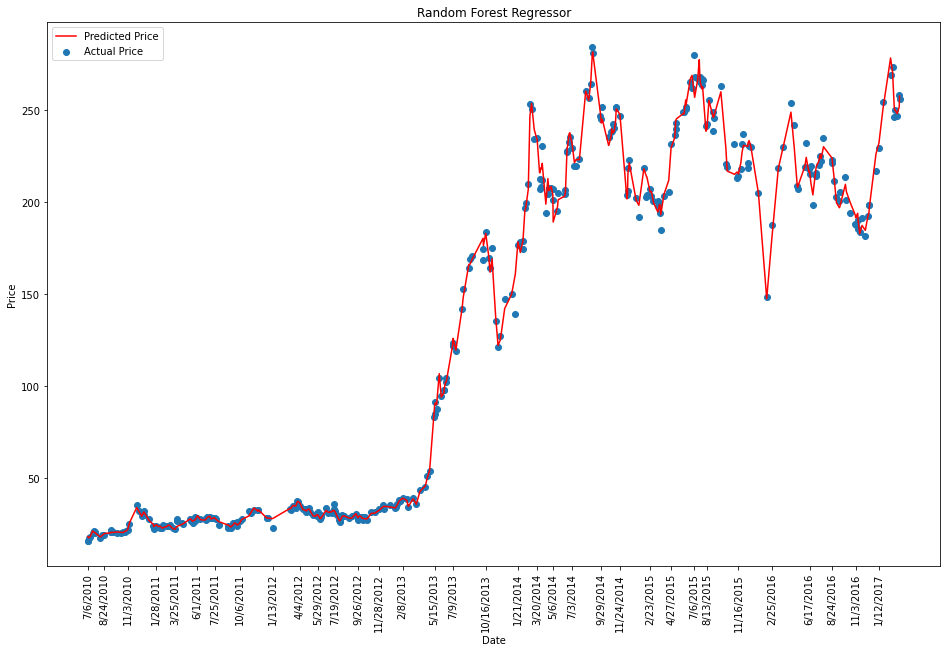

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 200, random_state = 0)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, forest.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Random Forest Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 5 : Model Evaluation

In [29]:
s1 = lin_reg.score(X_test,y_test)
s2 = qr.score(X_test,y_test)
s3 = KNN_model.score(X_test,y_test)
s4 = tree.score(X_test,y_test)
s5 = forest.score(X_test,y_test)

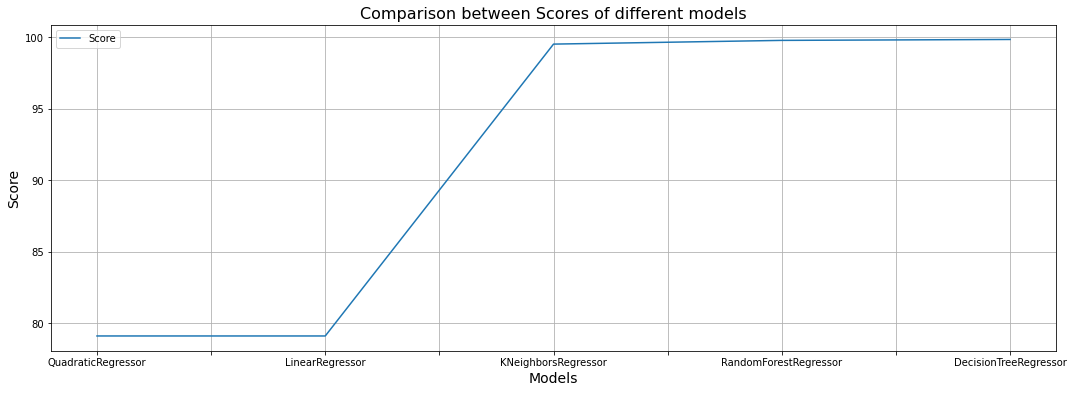

In [30]:
Models = ['QuadraticRegressor','LinearRegressor','KNeighborsRegressor','RandomForestRegressor','DecisionTreeRegressor']
Scores = [s2*100,s1*100,s3*100,s4*100,s5*100]

score_data=pd.DataFrame({'Model':Models,'Score':Scores})

score_data.plot(x='Model', y=['Score'], kind='line')

plt.title('Comparison between Scores of different models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid()
plt.show()

In [31]:
score_data

,Model,Score
0,QuadraticRegressor,79.103769
1,LinearRegressor,79.103105
2,KNeighborsRegressor,99.508878
3,RandomForestRegressor,99.768979
4,DecisionTreeRegressor,99.833360


## Hence Decision Tree Regressor will be final model

# Step 6 : Model Deployment

### Using Simple input output via screen

In [32]:
def predict():
    date = input('Enter date for which you want to predict Stock price of Tesla in "mm/dd/yyyy" format : ')
    pr_value = tree.predict([[toOrdinal(date)]])[0]
    print("The stock Price of Tesla on ",date," is $",pr_value,sep="")
    
#predict()
#Uncomment above line to use jupyter notebook to predict

### To deploy it in python server we will convert it into pickle file

In [33]:
import pickle

with open("Final Model.pickle","wb") as f:
    pickle.dump(tree,f)